<span style="display: block; background-color: lightgray; padding: 10px; border-bottom: 2px solid blue; color: blue; font-size: 32px;">Install Libraries</span>

In [ ]:
# ! pip install seaborn

In [1]:
# !pip install transformers

In [ ]:
# !pip install tensorflow
# ! pip install --upgrade pip

In [ ]:
# !pip install tqdm

In [ ]:
# !pip install nltk

In [ ]:
# !pip install textblob

In [ ]:
# !python -m textblob.download_corpora

In [2]:
# !pip install --upgrade tensorflow-io

<span style="display: block; background-color: lightgray; padding: 10px; border-bottom: 2px solid blue; color: blue; font-size: 32px;">Import Libraries</span>

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.initializers import TruncatedNormal
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.regularizers import l2
from keras import backend as K
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import AutoTokenizer,TFBertModel
from textblob import Word

In [7]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# num_tpus_available = len(tf.config.experimental.list_physical_devices('TPU'))
# print("Num TPUs Available: ", num_tpus_available)
# assert num_tpus_available > 0

In [ ]:
# num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
# print("Num GPUs Available: ", num_gpus_available)
# assert num_gpus_available > 0

<span style="display: block; background-color: lightgray; padding: 10px; border-bottom: 2px solid blue; color: blue; font-size: 32px;">Load Data</span>

<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Colab</span>

In [9]:
!gdown 1-F7f9oSjFx0Si44DvdkzFhjjwfro_Y1p
!gdown 1-Cb-kBGlVW6PPX4bR7IeZyU1lB0WoW2K
!gdown 1-CT2mHNnjfbTjVNS_akLqTtL2oPQi4R9

Downloading...

From: https://drive.google.com/uc?id=1-F7f9oSjFx0Si44DvdkzFhjjwfro_Y1p

To: /content/train_data.csv

100% 635M/635M [00:03<00:00, 160MB/s]

Downloading...

From: https://drive.google.com/uc?id=1-Cb-kBGlVW6PPX4bR7IeZyU1lB0WoW2K

To: /content/test_data.csv

100% 15.6M/15.6M [00:00<00:00, 128MB/s]

Downloading...

From: https://drive.google.com/uc?id=1-CT2mHNnjfbTjVNS_akLqTtL2oPQi4R9

To: /content/title_brand.csv

100% 97.3M/97.3M [00:00<00:00, 245MB/s]


In [11]:
# Load data
train_data = pd.read_csv('train_data.csv', low_memory=False)
test_data = pd.read_csv('test_data.csv')
map_data = pd.read_csv('title_brand.csv')

<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Kaggle</span>

In [6]:
# Load data
train_data = pd.read_csv('/kaggle/input/amazon-comments/train_data.csv', low_memory=False)
test_data = pd.read_csv('/kaggle/input/amazon-comments/test_data.csv')
map_data = pd.read_csv('/kaggle/input/amazon-comments/title_brand.csv')
path='/kaggle/working/'

<span style="display: block; background-color: lightgray; padding: 10px; border-bottom: 2px solid blue; color: blue; font-size: 32px;">Preproccessing</span>

In [7]:
train_data.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [8]:
test_data.head()

,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,NaN,True,2018-06-04,A20GGWE66JW9X2,B006Z394GM,{'Color:': ' FPS01-C'},Brian C Toner,The name and description of this device are mi...,The prize for most useless invention of all ti...,1528070400
1,NaN,True,2018-02-18,ARYJWXHEYHG9M,B005BE058W,"{'Size:': ' 1000W', 'Style:': ' G2'}",Snake,One of the molex connectors on the power suppl...,MELTED MOLEX CONNECTOR,1518912000
2,NaN,True,2018-01-20,A10LHZ7WFZ7HLL,B01DA0YCNC,NaN,Amazon Customer,Remote constantly disconnects/ Roku player fre...,Bricked on the regular,1516406400
3,NaN,True,2018-06-25,A11VN8EOHNLP72,B00FBJ4KYC,NaN,Jeremy Bray,I purchased this 4 year protection plan for a ...,DO NOT BUY!!!,1529884800
4,3.0,True,2016-08-17,A194Y8P8TVT7P9,B00P7G82TS,NaN,Mark,I bought one of these and have regretted it ev...,Nightmare - don't buy,1471392000


In [9]:
null_df = pd.concat([train_data.isna().sum() * 100 / len(train_data) , train_data.isna().sum()], axis=1)
null_df.columns=["percent", "num"]
null_df

,percent,num
overall,0.000000,0
vote,77.177499,647476
verified,0.000000,0
reviewTime,0.000000,0
reviewerID,0.000000,0
asin,0.000000,0
style,41.520173,348331
reviewerName,0.027058,227
reviewText,0.000000,0
summary,0.009059,76


In [10]:
test_data.isna().sum() * 100 / len(test_data)

vote              75.335
verified           0.000
reviewTime         0.000
reviewerID         0.000
asin               0.000
style             42.480
reviewerName       0.020
reviewText         0.000
summary            0.010
unixReviewTime     0.000
dtype: float64

In [16]:
df_train = train_data.copy()
df_test = test_data.copy()

<span style="display: block; padding: 1px; border-bottom: 2px solid green; color: green; font-size: 28px;">Text Cleaning</span>

In [17]:
lemmatizer = WordNetLemmatizer()
def text_cleaning(text):
    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Normalizing Case Folding - Uppercase to Lowercase
    text = text.lower()

#     # StopWords
#     sw = stopwords.words('english')
#     text = " ".join(x for x in text.split() if x not in sw)

#     # Remove Rare Words
#     temp_df = pd.Series(' '.join(text).split()).value_counts()
#     drops = temp_df[temp_df <= 1].index
#     text = " ".join(x for x in text.split() if x not in drops)
# #     # Lemmatize
# #     text = " ".join([Word(word).lemmatize() for word in text.split()])
#     text = " ".join(lemmatizer.lemmatize(word) for word in text.split())

    return text

In [18]:
def text_preprocessing(df, dependent_var):
#     lemmatizer = WordNetLemmatizer()
    dataframe = df.copy()
    for i in tqdm(range(3)):
        if i == 0:
            # Remove non-alphanumeric characters and extra whitespace
            dataframe[dependent_var] = dataframe[dependent_var].fillna('').apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
        if i == 1:
            # Convert multiple whitespace characters to a single space
            dataframe[dependent_var] = dataframe[dependent_var].fillna('').apply(lambda x: re.sub(r'\s+', ' ', x))
        if i == 2:
            # Normalizing Case Folding - Uppercase to Lowercase
            dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
#         if i == 3:
#             # StopWords
#             sw = stopwords.words('english')
#             dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
#         if i == 3:
#             # Remove Rare Words
#             temp_df = pd.Series(' '.join(dataframe[dependent_var]).split()).value_counts()
#             drops = temp_df[temp_df <= 1]
#             dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))
#         if i == 4:
#             # Lemmatize
#             dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#             dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split()))

    return dataframe

In [19]:
df_train = text_preprocessing(df_train, "reviewText")
df_train = text_preprocessing(df_train, "summary")

100%|██████████| 3/3 [01:12<00:00, 24.06s/it]

100%|██████████| 3/3 [00:05<00:00,  1.85s/it]


In [20]:
df_test = text_preprocessing(df_test, "reviewText")
df_test = text_preprocessing(df_test, "summary")

100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

100%|██████████| 3/3 [00:00<00:00, 22.25it/s]


In [21]:
df_train["reviewText"][8]

'it works i was skeptical about ordering it because the ratings werent great but short of buying a new nook or replacing it with a kindle it was the best shortterm option the original plugin part made a sizzling sound one night and stopped working my husband tried to plug the usb end into one of about usb to plugin wall chargers that we have around the house and none of them worked were assuming there must be some proprietary thing with the nook usb end that wont let you use generic wall chargers which really sucked because he couldnt use his nook for weeks if you are contemplating purchasing a nook it may be something to take into consideration'

In [ ]:
df_train['reviewText'] = df_train['reviewText'].apply(text_cleaning)
df_train['summary'] = df_train['summary'].fillna('')
df_train['summary'] = df_train['summary'].apply(text_cleaning)

In [ ]:
df_test['reviewText'] = df_test['reviewText'].apply(text_cleaning)
df_test['summary'] = df_test['summary'].fillna('')
df_test['summary'] = df_test['summary'].apply(text_cleaning)

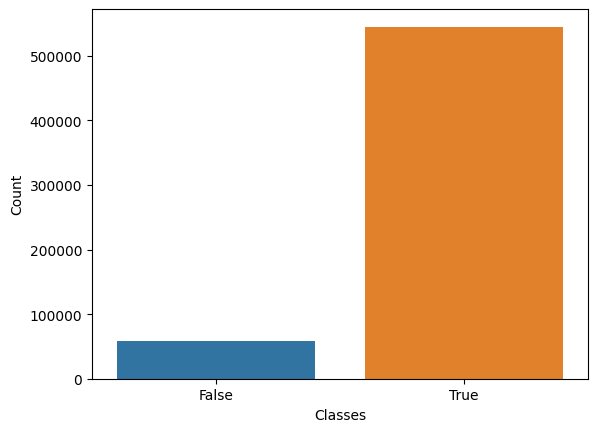

In [39]:
counts = df_train['verified'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Make Label</span>

In [24]:
df_train["verify"] = df_train["verified"].astype(int)

In [65]:
df_test["verify"] = df_test["verified"].astype(int)

In [26]:
df_train['review_lengths'] = df_train['reviewText'].apply(len)

In [27]:
df_train['summary_lengths'] = df_train['summary'].apply(len)

In [28]:
df_train['review_lengths'].max()

28429

In [29]:
df_train['summary_lengths'].max()

352

In [63]:
df_train['verified'].value_counts() #/ len(df)

True     545029
False     58861
Name: verified, dtype: int64

In [64]:
df_train[df_train['review_lengths'] < 600]['verified'].value_counts() #/ len(df)

True     539067
False     56682
Name: verified, dtype: int64

<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Drop reviewTexts where len(reviewText) > 600 and len(summary) < 100 </span>

In [32]:
df_train[(df_train['review_lengths'] > 600) & (df_train['summary_lengths'] < 100)].index

Int64Index([     7,      8,     26,     28,     45,     53,     54,     55,
                56,     58,
            ...
            838908, 838911, 838912, 838914, 838920, 838923, 838929, 838930,
            838933, 838937],
           dtype='int64', length=235054)

In [33]:
drop_indexes = df_train[(df_train['review_lengths'] > 600) & (df_train['summary_lengths'] < 100)].index

In [34]:
df_train = df_train.drop(drop_indexes)

In [35]:
df_train['review_lengths'] = df_train['reviewText'].apply(len)

In [36]:
df_train[(df_train['review_lengths'] > 600) & (df_train['summary_lengths'] < 100)]['overall'].value_counts() #/ len(df)

Series([], Name: overall, dtype: int64)

<span style="display: block; background-color: lightgray; padding: 10px; border-bottom: 2px solid blue; color: blue; font-size: 32px;">Sampling</span>

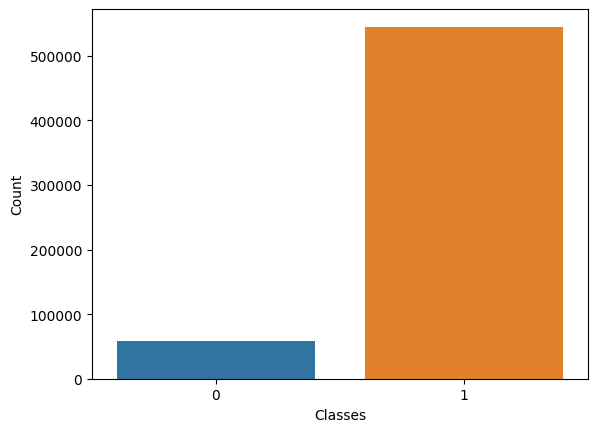

In [40]:
counts = df_train['verify'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

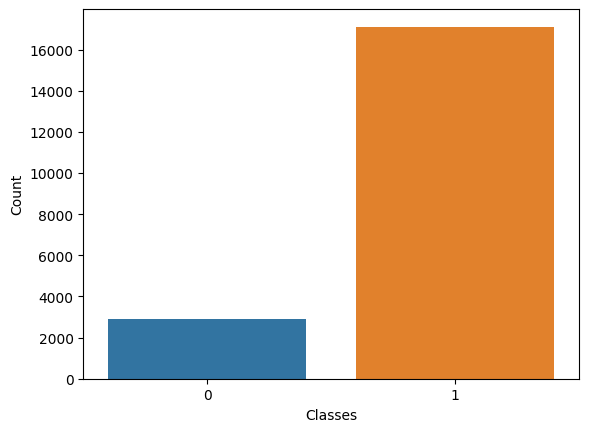

In [66]:
counts = df_test['verify'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [41]:
def sampling(df, num_target, each_class_size):
    # Identify the size of the smallest class
    min_class_size = min(each_class_size, df[num_target].value_counts().min())

    # Perform random sampling for each class to balance the sizes
    balanced_df = pd.concat([
        df[df[num_target] == sentiment].sample(min_class_size, replace=True)
        for sentiment in df[num_target].unique()
    ])

    # Shuffle the rows to randomize the order of samples
    balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
    return balanced_df

In [45]:
df_train['verify'].value_counts()

1    545029
0     58861
Name: verify, dtype: int64

In [46]:
df_train_balanced = sampling(df_train, 'verify', 50000)

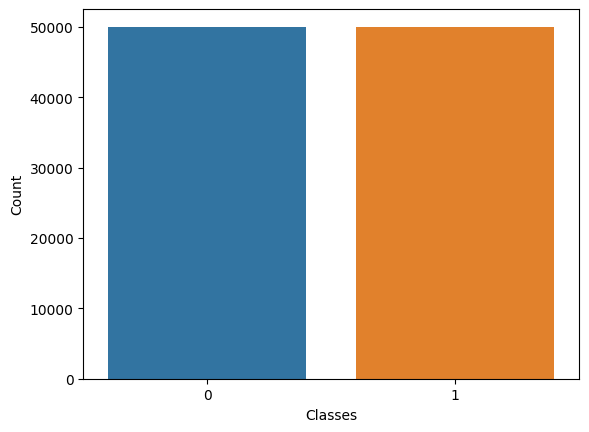

In [47]:
counts = df_train_balanced['verify'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [48]:
def save_model(model, tokenizer, filename, path=''):
    save_dir = os.path.join(path, filename)

    # Save tokenizer
    tokenizer.save_pretrained(save_dir +'/Tokenizer')

    # Save model
    model.save_pretrained(save_dir +'/Model')
    print("Saved model to ", save_dir )

def load_model(model, tokenizer, filename, path=''):
    load_dir = os.path.join(path, filename)

    # Load tokenizer
    tokenizer = tokenizer.from_pretrained(load_dir +'/Tokenizer')

    # Load model
    model = model.from_pretrained(load_dir +'/Model')

    return model, tokenizer

<span style="display: block; background-color: lightgray; padding: 10px; border-bottom: 2px solid blue; color: blue; font-size: 32px;">Split Data</span>

In [68]:
# Training data
Reviews = df_train_balanced['reviewText']
labels = df_train_balanced['verify']
# Test data
test_reviews = df_test['reviewText']
test_labels = df_test['verify']

In [52]:
train_reviews, validation_reviews, train_labels, validation_labels = train_test_split(Reviews, labels, test_size=0.3, random_state=42)

<span style="display: block; background-color: lightgray; padding: 10px; border-bottom: 2px solid blue; color: blue; font-size: 32px;">Try Models</span>

<span style="display: block; padding: 1px; border-bottom: 2px solid green; color: green; font-size: 28px;">Model 1</span>

<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Tokenize</span>

In [50]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [57]:
max_len = 128
# Tokenize and encode the sentences
train_encoded = tokenizer(train_reviews.tolist(),
                            padding=True,
                            truncation=True,
                            max_length = max_len,
                            return_tensors='tf')
val_encoded = tokenizer(validation_reviews.tolist(),
                            padding=True,
                            truncation=True,
                            max_length = max_len,
                            return_tensors='tf')
test_encoded = tokenizer(test_reviews.tolist(),
                            padding=True,
                            truncation=True,
                            max_length = max_len,
                            return_tensors='tf')


<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Train Model</span>

In [58]:
num_classes = 2

# Intialize the model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = ['accuracy']
# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                               min_delta=0,
                                               patience=3,
                                               mode='max',
                                               restore_best_weights=True)

# Trainthe model
batch_size = 32
history = model.fit(
    [train_encoded['input_ids'], train_encoded['attention_mask']],
    train_labels,
    validation_data=(
        [val_encoded['input_ids'], val_encoded['attention_mask']],
        validation_labels
    ),
    batch_size=32,
    epochs=20,
    callbacks=[early_stopping]
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']

- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).

- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).

Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']

You sho

Epoch 1/20

2188/2188 [==============================] - 1036s 462ms/step - loss: 0.6337 - accuracy: 0.6347 - val_loss: 0.6045 - val_accuracy: 0.6663

Epoch 2/20

2188/2188 [==============================] - 1022s 467ms/step - loss: 0.5511 - accuracy: 0.7194 - val_loss: 0.5957 - val_accuracy: 0.6838

Epoch 3/20

2188/2188 [==============================] - 1025s 469ms/step - loss: 0.4160 - accuracy: 0.8144 - val_loss: 0.6101 - val_accuracy: 0.7173

Epoch 4/20

2188/2188 [==============================] - 1028s 470ms/step - loss: 0.2601 - accuracy: 0.8963 - val_loss: 0.6544 - val_accuracy: 0.7365

Epoch 5/20

2188/2188 [==============================] - 1022s 467ms/step - loss: 0.1531 - accuracy: 0.9432 - val_loss: 0.7422 - val_accuracy: 0.7348

Epoch 6/20

2188/2188 [==============================] - 1023s 468ms/step - loss: 0.0970 - accuracy: 0.9648 - val_loss: 1.0399 - val_accuracy: 0.7516

Epoch 7/20

2188/2188 [==============================] - 1022s 467ms/step - loss: 0.0753 - acc

<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Evaluate on Validation Data</span>

In [59]:
predicted_val = model.predict([val_encoded['input_ids'], val_encoded['attention_mask']])
logits_val = predicted_val.logits

y_val_predicted = tf.argmax(logits_val, axis=1)
y_val_predicted = y_val_predicted.numpy()

y_true = validation_labels
print(f"F1_micro: {f1_score(y_true, y_val_predicted, average='micro')}")

938/938 [==============================] - 130s 138ms/step

F1_micro: 0.7526333333333335


In [60]:
print("Classification Report: \n", classification_report(y_true, y_val_predicted))

Classification Report: 

               precision    recall  f1-score   support



           0       0.79      0.69      0.74     15148

           1       0.72      0.82      0.77     14852



    accuracy                           0.75     30000

   macro avg       0.76      0.75      0.75     30000

weighted avg       0.76      0.75      0.75     30000




<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Evaluate on Test Data

In [69]:
predicted_test = model.predict([test_encoded['input_ids'], test_encoded['attention_mask']])
logits_test = predicted_test.logits

y_test_predicted = tf.argmax(logits_test, axis=1)
y_test_predicted = y_test_predicted.numpy()

y_true = test_labels
print(f"F1_micro: {f1_score(y_true, y_test_predicted, average='micro')}")

625/625 [==============================] - 87s 139ms/step

F1_micro: 0.70565


In [78]:
print("Classification Report: \n", classification_report(y_true, y_test_predicted, labels=[-1,0,1]))

Classification Report: 

               precision    recall  f1-score   support



          -1       0.00      0.00      0.00         0

           0       0.24      0.50      0.33      2885

           1       0.90      0.74      0.81     17115



   micro avg       0.71      0.71      0.71     20000

   macro avg       0.38      0.41      0.38     20000

weighted avg       0.80      0.71      0.74     20000




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classific

<span style="display: block; padding: 1px; border-bottom: 2px solid green; color: green; font-size: 28px;">Model 2</span>

<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Train Model</span>

In [ ]:
num_classes = 2

# Initialize the model
bert = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_classes)

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert([input_ids, input_mask])[0]
out = tf.keras.layers.Flatten()(embeddings)
out = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(out)
out = tf.keras.layers.Dropout(0.2)(out)
out = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(out)
y = Dense(num_classes, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = ['accuracy']
# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=3,
    mode='max',
    restore_best_weights=True
)

# Train the model
history = model.fit(
    [train_encoded['input_ids'], train_encoded['attention_mask']],
    train_labels,
    validation_data=(
        [val_encoded['input_ids'], val_encoded['attention_mask']],
        validation_labels
    ),
    batch_size=32,
    epochs=20,
    callbacks=[early_stopping]
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']

- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).

- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).

Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']

You sho

Epoch 1/20

2188/2188 [==============================] - 1073s 480ms/step - loss: 0.9639 - accuracy: 0.5831 - val_loss: 0.7832 - val_accuracy: 0.6238

Epoch 2/20

2188/2188 [==============================] - 1022s 467ms/step - loss: 0.7091 - accuracy: 0.6492 - val_loss: 0.6740 - val_accuracy: 0.6517

Epoch 3/20

2188/2188 [==============================] - 1022s 467ms/step - loss: 0.6153 - accuracy: 0.6988 - val_loss: 0.6415 - val_accuracy: 0.6691

Epoch 4/20

2188/2188 [==============================] - 1023s 467ms/step - loss: 0.5412 - accuracy: 0.7501 - val_loss: 0.6393 - val_accuracy: 0.6796

Epoch 5/20

1394/2188 [==================>...........] - ETA: 5:19 - loss: 0.4563 - accuracy: 0.8059

<span style="color:green; border-bottom: 2px solid green;font-size: 24px;">Evaluate Model </span>

In [ ]:
predicted_test = model.predict([test_encoded['input_ids'], test_encoded['attention_mask']])
logits_test = predicted_test.logits

y_test_predicted = tf.argmax(logits_test, axis=1)
y_test_predicted = y_test_predicted.numpy()
